In [1]:
from ipywidgets import interact, interactive, FloatSlider, IntSlider, ToggleButtons
from geoscilabs.em.TDEMGroundedSource import choose_model, load_or_run_results, PlotTDEM
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Exploring fields from a grounded source

## Purpose

We explore time-domain electromagnetic (EM) simulation results from a grounded source. Both electric currents and magnetic flux will be visualized to undertand physics of grounded source EM. Both charge buildup (galvanic) and EM induction (inductive) will occur at different times. 

## Load simulation results (or run)

Three models are considered here. 

- Halfspace (0.01 S/m)
- Conductive block in halfspace (1 S/m)
- Resitive block in halfspace (10$^{-4}$ S/m)

Using below widget, you can choose a model that you want to explore. 

In [2]:
Q = interact(choose_model, 
         model=ToggleButtons(
             options=["halfspace", "conductor", "resistor"], value="halfspace"
         )
)

interactive(children=(ToggleButtons(description='model', options=('halfspace', 'conductor', 'resistor'), value…

Then here we are going to load results. If you want to rerun, you can set `re_run` as `True`. 
With that option, you can change conductivity value of the block and halfspace you can alter values for `sigma_halfspace` and `sigma_block`.

In [3]:
import matplotlib
matplotlib.rcParams['font.size']=16
options = load_or_run_results(
    re_run=False, 
    fname=choose_model(Q.widget.kwargs['model']),
    sigma_block=0.01,
    sigma_halfspace=0.01
)
tdem = PlotTDEM(**options)

file already exists, new file is called /Users/lindseyjh/git/geosci/geosci-labs/notebooks/em/tdem_groundedsource.tar
   saved to: /Users/lindseyjh/git/geosci/geosci-labs/notebooks/em/tdem_groundedsource.tar
Download completed!


In [4]:
interact(
    tdem.show_3d_survey_geometry, 
    elev=FloatSlider(min=-180, max=180, step=10, value=30),
    azim=FloatSlider(min=-180, max=180, step=10, value=-45),
)


interactive(children=(FloatSlider(value=30.0, description='elev', max=180.0, min=-180.0, step=10.0), FloatSlid…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [5]:
interact(
    tdem.plot_input_currents, 
    itime=IntSlider(min=15, max=50, step=1, value=15, continuous_update=False),
    scale=ToggleButtons(
        options=["linear", "log"], value="linear"
    ),
    
)

interactive(children=(IntSlider(value=15, continuous_update=False, description='itime', max=50, min=15), Toggl…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

interactive(children=(IntSlider(value=15, continuous_update=False, description='itime', max=50, min=15), Outpu…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

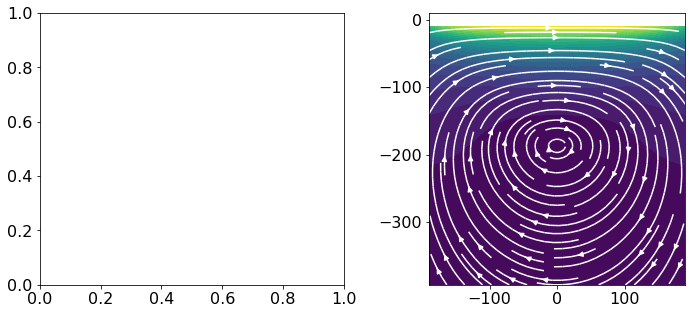

In [6]:
interact(
    tdem.plot_electric_currents, 
    itime=IntSlider(min=15, max=50, step=1, value=15, continuous_update=False)
)

interactive(children=(IntSlider(value=15, continuous_update=False, description='itime', max=50, min=15), Outpu…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

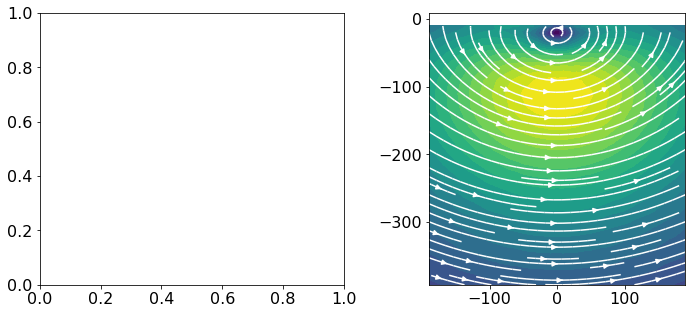

In [7]:
interact(
    tdem.plot_magnetic_flux, 
    itime=IntSlider(min=15, max=50, step=1, value=15, continuous_update=False)
)